# Uczenie nienadzorowane

Do tej pory zajmowaliśmy się uczeniem nadzorowanym (ang. *supervised*), tj. takimi przypadkami, gdy zbiór trenujący składał się z dwóch zmiennych `X` i `y`, a naszym zadaniem było przewidzenia `y` na podstawie danych z `X`. Ponadto poznaliśmy odpowiednie metryki, które pozwalały nam zmierzyć jak dobrze (lub) źle działają modele, które wytrenowaliśmy.

Przypomnijmy, że na uczenie maszynowe składają się trzy paradygmaty:
 * supervised learning
 * unsupervised learning
 * reinforcement learning
 
Dzisiejsze zajęcia są poświęcone drugiemu paradygmatowi, czyli uczeniu nienadzorowanym, a dokładniej automatycznemu klastrowaniu. Do klastrowania służą m.in. następujące algorytmy:
 * K-średnich (ang. *k-means*)
 * [DB-SCAN](https://en.wikipedia.org/wiki/DBSCAN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Zadanie 0**: wczytaj do zmiennej `points` zbiór danych z pliku `points.csv`. Uwaga: kolumny są rozdzielone spacją. Plik nie zawiera nagłówka.

In [116]:
points  = pd.read_csv('points.csv', sep=' ', header=None)

Narysujmy wykres z wyżej wczytanych punktów.

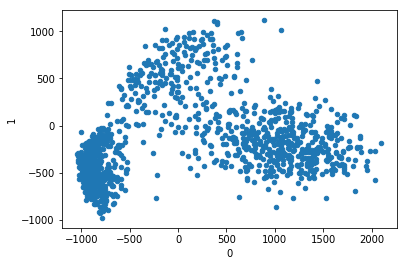

In [117]:
xs = points[0]
ys = points[1]

points.plot(kind='scatter', x=0, y=1)

**zadanie 1** Ile dostrzegasz rozdzielnych grup punktów na powyższym wykresie?

Podstawowym akgorytmem do klastrowania danych jest $k$-średnich albo k-means, który został omówiony na wykładzie.  Oczywiście biblioteka `sklearn` zawiera implementację tego algorytmu.

**zadanie 2** Wczytaj z biblioteki `sklearn.cluster` klasę `KMeans`.

Algorytm k-means  wymaga podania oczekiwanej liczby klas, dlatego podczas tworzenia obiektu `KMeans` musimy podać parametr `n_clusters`. W poniższym przykładzie ustawiamy powyższy parametr na 3.

In [120]:
kmeans = KMeans(n_clusters=3)

**zadanie 3** Wywołaj metodę `fit` na obiekcie `kmeans` i jako parametr przekaż zmienną `points`. W taki sposób wytrenujesz model.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**zadanie 4** Mając wytrenowany model k-średnich, możemy wyznaczyć klaster, do którego został przydzielony każdy z punktów. Służy do tego komenda *predict*. Wywołaj tę komendę na zmiennej *points* i zapisz wynik do zmiennej *clusters*.

Wyświetlmy, w jaki sposób model podzielił punkty:

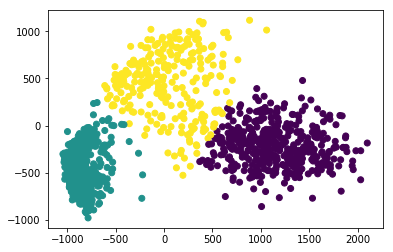

In [125]:
plt.scatter(x=points[0], y=points[1], c=clusters)
plt.show()

Informacje o centroidach są przechowywwane w atrybucie `cluster_centers_`:

In [129]:
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print("Claster ID: {}\tX: {}\tY:{}".format(idx, centroid[0], centroid[1]))

Claster ID: 0	X: 1158.9296227871434	Y:-212.28055211754568
Claster ID: 1	X: -844.3076877296985	Y:-450.0715318089522
Claster ID: 2	X: 60.61234354820601	Y:444.84943020237415


**zadanie 5** Sprawdź, w jaki sposób podzieli zbiór punktów model k-średnich, jeżeli ustawimy liczbę klastrów na 2 i 4.

Algorytm k-średnich minimalizuje sumę odległości do najbliżsego centroidu, co możemy traktować jako funkcje kosztu i wykorzystać to porównania pomiędzy modelami z różnymi liczbami klastrów.

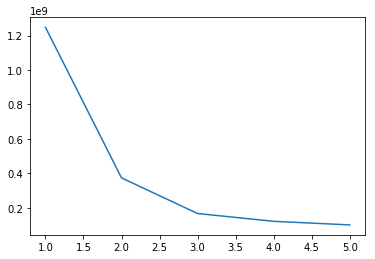

In [132]:
n_clusters = [1, 2, 3, 4, 5]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters=n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

Powyższy wykres przedstawia zależność pomiędzy liczbą klastrów, a funkcją kosztu. Można łatwo zauważyć, powyżej 3 klastrów zależność na wygładza się. Stąd, liczba 3 wydaje się być najlepszym wyborem.

Drugim popularnym algorytmem jest DB-SCAN, który nie wymaga `a priori` podania liczby klastrów, którą sam ją wyznacza. Ponadto, cechą tego modelu jest możliwość pominięcia niektórych punktów, które są oddalone od skupisk.

In [133]:
from sklearn.cluster import DBSCAN

Model DB-SCAN przyjmuje dwa parametry: eps - odległość pomiędzy punktami i minimalną liczbę punktów potrzebna do utworzenia klastra.

In [168]:
db = DBSCAN(eps=130, min_samples=10)
labels = db.fit_predict(points)
labels

array([0, 0, 0, ..., 2, 2, 2])

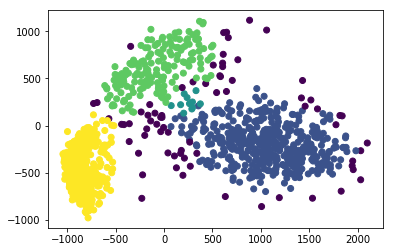

In [169]:
plt.scatter(x=points[0], y=points[1], c=labels)
plt.show()

**zadanie 6** Przeskaluj dane, tak aby miały rozkład standardowy (średnia = 0 , std = 1). I uruchom model SB-SCAN i k-średnich. Czy normalizacja zmieniła coś?

### Redukcja wymiaru

Jedną z wad algorytmu k-średnich jest czas trenowania, który rośnie z wymiarem danych, jak ich z liczbą przykładów trenujących. Podstawową techniką w takim przypadku jest zmniejszenie wymiarowości danych. Najprostszą techniką jest [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [189]:
from sklearn.decomposition import PCA

Ściągnijmy zbiór dancych MNIST, który pojawił się na naszych zajęciach.

In [183]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

Podczas tworzeania PCA, możemy podać wyjsciową liczbę wymiarów (argument *n_components*). 

In [190]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [191]:
mnist_pca = pca.transform(X)

**zadanie 7** Wytrenuj K-Means na wyjściu z PCA. Ustaw liczbę klastrów na 10. Ponadto zapisz do `mnist_clasters` numer klastra, do którego został on przydzielony.

**zadanie 8** Zmienna `y` zawiera informację o prawidłowych oznaczeniach: tj. liczby od 0 do 9 (włącznie). Dla każdej cyfry *i* znajdz klaster *j*, w którym znajduje się najwięcej cyfr *i*.

array([1, 7, 8, 3, 0, 2, 4, 1, 6, 0])

**zadanie 9** mając wyznaczone klasy z poprzedniego zadania, sumuj liczbę elementów w najpopularniejszym klastrze.

0.5762857142857143

**zadanie 10** Oblicz accuracy biorąc wynik z poprzedniego zadania.

**zadanie 11** Spróbuj podwyższych wynik, stosując np. normalizację lub zmieniając parametry.

**Gratuluję!**